In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df=pd.read_csv("./datasets/missing_categorical.csv")

In [86]:
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [87]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
df=df[["GarageQual","FireplaceQu","SalePrice"]]

In [90]:
df.head(5)

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [91]:
df.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

######  As we can see that "GarageQual" column is missing value is 5%, so we can replace with mode and "FireplaceQu" column is replace with new category

In [92]:
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,2:3],shuffle=False)

In [93]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1095, 2), (365, 2), (1095, 1), (365, 1))

In [94]:
trf1=ColumnTransformer(transformers=[
    ('mode', SimpleImputer(strategy="most_frequent"),[0,1])
    
],
remainder="passthrough")

In [95]:
trf1.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mode',
                                 SimpleImputer(strategy='most_frequent'),
                                 [0, 1])])

In [96]:
X_train_transform=trf1.transform(X_train)
X_test_transform=trf1.transform(X_test)

In [97]:
X_train1=pd.DataFrame(X_train_transform,columns=X_train.columns)
X_test1=pd.DataFrame(X_test_transform,columns=X_train.columns)

In [98]:
X_train1.shape,X_test1.shape,y_train.shape,y_test.shape

((1095, 2), (365, 2), (1095, 1), (365, 1))

In [99]:
X_train1.head()

,GarageQual,FireplaceQu
0,TA,Gd
1,TA,TA
2,TA,TA
3,TA,Gd
4,TA,TA


In [100]:
X_train.head()

,GarageQual,FireplaceQu
0,TA,NaN
1,TA,TA
2,TA,TA
3,TA,Gd
4,TA,TA


# Distribution of data before imputation and after Imputation 

##### In below distribution of "saleprice", we can see that "FireplaceQu" has less than 5% missing, so no change in distribution, but if "GarageQual" has more that 5% missing, so it change the distribution of the "saleprice"

In [101]:
X_train["FireplaceQu"].mode()

0    Gd
Name: FireplaceQu, dtype: object

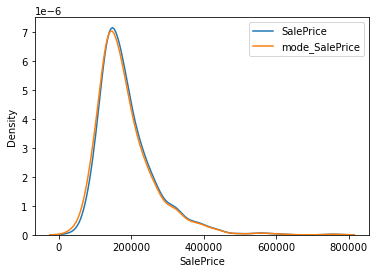

In [102]:
sns.kdeplot(y_train[X_train["GarageQual"]=="TA"]["SalePrice"],label="SalePrice")
sns.kdeplot(y_train[X_train1["GarageQual"]=="TA"]["SalePrice"],label="mode_SalePrice")
plt.legend()
plt.show()

In [103]:
print(X_train["FireplaceQu"].mode())
print(X_train["GarageQual"].mode())

0    Gd
Name: FireplaceQu, dtype: object
0    TA
Name: GarageQual, dtype: object


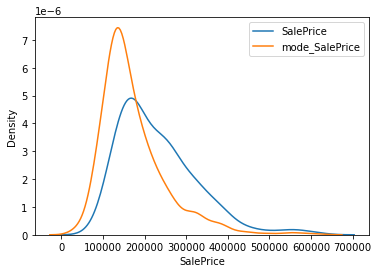

In [104]:
sns.kdeplot(y_train[X_train["FireplaceQu"]=="Gd"]["SalePrice"],label="SalePrice")
sns.kdeplot(y_train[X_train1["FireplaceQu"]=="Gd"]["SalePrice"],label="mode_SalePrice")
plt.legend()
plt.show()